<a href="https://colab.research.google.com/github/jusgocho/financial-data-analysis/blob/main/applying_ml_on_fundanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Optimization through Machine Learning Techniques



### Interpretation of Principal Components

This table shows how much each original financial ratio contributes to the principal components. A larger absolute value indicates a stronger influence. For example, PC1 seems to be related to profitability ratios like Return on Equity and Profit Margin, while PC3 is heavily influenced by Market Cap and Average Volume.

In [ ]:
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8']

# pc_comps = ['PC1', 'PC2', 'PC3', 'PC4']

data_pca = pd.DataFrame(np.round(pca.components_[:8,:],2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

### Visualizing Principal Components

This scatter plot shows the data points projected onto the first two principal components (PC1 and PC2). This visualization can help to identify clusters or patterns in the data based on these two principal components.

In [ ]:
plt.figure(figsize = (7,7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

### Next Steps: Clustering and Portfolio Formation

Now that we have reduced the dimensionality of the data using PCA, the next logical step is to apply clustering algorithms (like K-Means) to group similar stocks based on their principal component scores. These clusters can then potentially be used to form diversified portfolios.

We could also visualize the clusters using t-SNE for a 2D representation that highlights local patterns.

# Portfolio Optimization through Machine Learning Techniques

This notebook explores how machine learning techniques can be used to optimize investment portfolios. We will analyze financial data for 400 stocks across different sectors, using 25 key financial ratios. A technique called Principal Component Analysis (PCA) will be applied to simplify the data while keeping the most important information.

## Project Overview

The goal of this project is to demonstrate a data-driven approach to portfolio optimization. By understanding the relationships between different financial metrics and reducing the complexity of the data, we can potentially build more effective investment strategies.

## Data Loading and Initial Exploration

The first step is to load the financial data and get a basic understanding of its structure and content.

In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn sklearn-learn

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# Load the financial data from a CSV file in Google Drive
data_financial = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/financial_df.csv')

### Data Preview

Let's take a look at the first few rows of the dataset to see what kind of information we have. Each row represents a stock, and the columns contain various financial metrics.

In [ ]:
# Display the first 5 rows of the dataframe to get a glimpse of the data
data_financial.head()

### Data Information

To understand the dataset better, we'll check the data types of each column and see if there are any missing values. This helps in identifying potential issues before we start the analysis.

In [ ]:
# Display information about the dataframe, including column names, non-null counts, and data types
data_financial.info()

In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn sklearn-learn

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install pandas numpy matplotlib seaborn sklearn-learn

ERROR: Could not find a version that satisfies the requirement sklearn-learn (from versions: none)
ERROR: No matching distribution found for sklearn-learn


In [ ]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# Load the financial data from a CSV file in Google Drive
data_financial = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/financial_df.csv')

In [ ]:
# Display the first 5 rows of the dataframe to get a glimpse of the data
data_financial.head()

,ticker,sector,market_cap_millions,price_earnings_ratio,price_book_ratio,ev_ebitda_ratio,price_sales_ratio,return_on_equity,return_on_assets,profit_margin,...,beta,volatility_30d,avg_volume_millions,price_momentum_3m,price_momentum_12m,rsi_14d,price_to_ma50,price_to_ma200,dividend_yield,payout_ratio
0,ENER000,ENER,18596.0,12.111294,1.265881,27.996537,6.266222,-0.0070,0.0182,-0.0297,...,0.900098,0.080000,25.71,-0.169323,0.169810,9.739398,1.001747,1.002145,0.000000,0.051831
1,HEAL001,HEAL,7778.0,5.442876,1.964195,8.656634,0.660084,0.1851,0.0186,0.0746,...,0.661477,0.080000,3.92,-0.169648,-0.083825,43.052024,1.004120,1.201224,0.033493,0.365542
2,FINA002,FINA,24394.0,13.406304,2.461537,16.207290,3.750588,0.1702,0.0663,0.0964,...,1.301589,0.080000,18.77,0.130385,0.109280,57.488475,0.926259,1.086430,0.011792,0.055695
3,HEAL003,HEAL,87872.0,7.222057,2.619886,4.666009,1.187243,0.1404,0.0874,0.1427,...,1.073009,0.080000,61.37,0.204768,0.396259,47.231531,1.000439,0.991926,0.035942,0.061235
4,REAL004,REAL,7225.0,3.263508,1.166810,6.270545,1.198134,0.1023,0.0503,0.0175,...,1.069474,0.119155,2.25,-0.309228,-0.099788,5.000000,1.102281,0.924132,0.015044,0.348280


In [ ]:
# Display information about the dataframe, including column names, non-null counts, and data types
data_financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ticker                400 non-null    object 
 1   sector                400 non-null    object 
 2   market_cap_millions   400 non-null    float64
 3   price_earnings_ratio  400 non-null    float64
 4   price_book_ratio      400 non-null    float64
 5   ev_ebitda_ratio       400 non-null    float64
 6   price_sales_ratio     400 non-null    float64
 7   return_on_equity      400 non-null    float64
 8   return_on_assets      400 non-null    float64
 9   profit_margin         400 non-null    float64
 10  gross_margin          400 non-null    float64
 11  operating_margin      400 non-null    float64
 12  debt_to_equity        400 non-null    float64
 13  current_ratio         400 non-null    float64
 14  quick_ratio           400 non-null    float64
 15  interest_coverage     4

In [ ]:
# Data Check
data_financial.info()
data_financial['ticker'].value_counts()
data_financial['ticker'].unique()
data_financial.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ticker                400 non-null    object 
 1   sector                400 non-null    object 
 2   market_cap_millions   400 non-null    float64
 3   price_earnings_ratio  400 non-null    float64
 4   price_book_ratio      400 non-null    float64
 5   ev_ebitda_ratio       400 non-null    float64
 6   price_sales_ratio     400 non-null    float64
 7   return_on_equity      400 non-null    float64
 8   return_on_assets      400 non-null    float64
 9   profit_margin         400 non-null    float64
 10  gross_margin          400 non-null    float64
 11  operating_margin      400 non-null    float64
 12  debt_to_equity        400 non-null    float64
 13  current_ratio         400 non-null    float64
 14  quick_ratio           400 non-null    float64
 15  interest_coverage     4

np.int64(0)

### EDA and Preprocessing

In [ ]:
# EDA and Preprocessing
data_financial.drop(columns=['ticker'], inplace=True)

In [ ]:
data_financial.head()

,sector,market_cap_millions,price_earnings_ratio,price_book_ratio,ev_ebitda_ratio,price_sales_ratio,return_on_equity,return_on_assets,profit_margin,gross_margin,...,beta,volatility_30d,avg_volume_millions,price_momentum_3m,price_momentum_12m,rsi_14d,price_to_ma50,price_to_ma200,dividend_yield,payout_ratio
0,ENER,18596.0,12.111294,1.265881,27.996537,6.266222,-0.0070,0.0182,-0.0297,0.188180,...,0.900098,0.080000,25.71,-0.169323,0.169810,9.739398,1.001747,1.002145,0.000000,0.051831
1,HEAL,7778.0,5.442876,1.964195,8.656634,0.660084,0.1851,0.0186,0.0746,0.390300,...,0.661477,0.080000,3.92,-0.169648,-0.083825,43.052024,1.004120,1.201224,0.033493,0.365542
2,FINA,24394.0,13.406304,2.461537,16.207290,3.750588,0.1702,0.0663,0.0964,0.400440,...,1.301589,0.080000,18.77,0.130385,0.109280,57.488475,0.926259,1.086430,0.011792,0.055695
3,HEAL,87872.0,7.222057,2.619886,4.666009,1.187243,0.1404,0.0874,0.1427,0.434242,...,1.073009,0.080000,61.37,0.204768,0.396259,47.231531,1.000439,0.991926,0.035942,0.061235
4,REAL,7225.0,3.263508,1.166810,6.270545,1.198134,0.1023,0.0503,0.0175,0.278891,...,1.069474,0.119155,2.25,-0.309228,-0.099788,5.000000,1.102281,0.924132,0.015044,0.348280


In [ ]:
data_financial.describe().T

,count,mean,std,min,25%,50%,75%,max
market_cap_millions,400.0,31541.040000,150546.107236,100.000000,3407.500000,9461.500000,22962.750000,2.868193e+06
price_earnings_ratio,400.0,9.285049,9.155083,3.000000,3.694115,6.597704,11.405440,9.991818e+01
price_book_ratio,400.0,2.711739,2.003545,0.248706,1.437271,2.143953,3.336586,1.400307e+01
ev_ebitda_ratio,400.0,11.016468,6.839151,1.577310,6.298429,9.217910,13.635821,5.024283e+01
price_sales_ratio,400.0,4.188952,4.093446,0.148108,1.652207,3.035910,4.994544,3.330871e+01
return_on_equity,400.0,0.145386,0.137626,-0.236200,0.051875,0.148450,0.235800,5.004000e-01
return_on_assets,400.0,0.085994,0.085374,-0.197500,0.032800,0.087900,0.136425,3.368000e-01
profit_margin,400.0,0.120080,0.099863,-0.146000,0.052000,0.123500,0.183425,4.271000e-01
gross_margin,400.0,0.402062,0.183527,-0.059205,0.276066,0.387215,0.522802,9.687206e-01
operating_margin,400.0,0.176963,0.124538,-0.185219,0.089990,0.181986,0.261120,5.285071e-01


In [ ]:
# data_financial.info()
# data_financial.isnull().sum()
# data_financial.isna().sum()
data_financial.duplicated().sum()

np.int64(0)

In [ ]:
# Identify categorical columns
categorical_cols = data_financial.select_dtypes(include=['object']).columns

# Encode categorical columns using one-hot encoding
data_financial_encoded = pd.get_dummies(data_financial, columns=categorical_cols, drop_first=True)

# Display the updated dataframe
display(data_financial_encoded.head())

,market_cap_millions,price_earnings_ratio,price_book_ratio,ev_ebitda_ratio,price_sales_ratio,return_on_equity,return_on_assets,profit_margin,gross_margin,operating_margin,...,price_to_ma200,dividend_yield,payout_ratio,sector_ENER,sector_FINA,sector_HEAL,sector_INDU,sector_REAL,sector_TECH,sector_UTIL
0,18596.0,12.111294,1.265881,27.996537,6.266222,-0.0070,0.0182,-0.0297,0.188180,-0.039832,...,1.002145,0.000000,0.051831,True,False,False,False,False,False,False
1,7778.0,5.442876,1.964195,8.656634,0.660084,0.1851,0.0186,0.0746,0.390300,0.045124,...,1.201224,0.033493,0.365542,False,False,True,False,False,False,False
2,24394.0,13.406304,2.461537,16.207290,3.750588,0.1702,0.0663,0.0964,0.400440,0.075947,...,1.086430,0.011792,0.055695,False,True,False,False,False,False,False
3,87872.0,7.222057,2.619886,4.666009,1.187243,0.1404,0.0874,0.1427,0.434242,0.149716,...,0.991926,0.035942,0.061235,False,False,True,False,False,False,False
4,7225.0,3.263508,1.166810,6.270545,1.198134,0.1023,0.0503,0.0175,0.278891,0.114838,...,0.924132,0.015044,0.348280,False,False,False,False,True,False,False


In [ ]:
data_financial['sector'].unique()

array(['ENER', 'HEAL', 'FINA', 'REAL', 'UTIL', 'TECH', 'CONS', 'INDU'],
      dtype=object)

In [ ]:
# Converts all the elements in the 'sector' column to number 0-8
sector_mapping = {sector: i for i, sector in enumerate(data_financial['sector'].unique())}
data_financial['sector_encoded'] = data_financial['sector'].map(sector_mapping)
data_financial = data_financial.drop('sector', axis=1)

In [ ]:
data_financial.head(10)

,market_cap_millions,price_earnings_ratio,price_book_ratio,ev_ebitda_ratio,price_sales_ratio,return_on_equity,return_on_assets,profit_margin,gross_margin,operating_margin,...,volatility_30d,avg_volume_millions,price_momentum_3m,price_momentum_12m,rsi_14d,price_to_ma50,price_to_ma200,dividend_yield,payout_ratio,sector_encoded
0,18596.0,12.111294,1.265881,27.996537,6.266222,-0.0070,0.0182,-0.0297,0.188180,-0.039832,...,0.080000,25.71,-0.169323,0.169810,9.739398,1.001747,1.002145,0.000000,0.051831,0
1,7778.0,5.442876,1.964195,8.656634,0.660084,0.1851,0.0186,0.0746,0.390300,0.045124,...,0.080000,3.92,-0.169648,-0.083825,43.052024,1.004120,1.201224,0.033493,0.365542,1
2,24394.0,13.406304,2.461537,16.207290,3.750588,0.1702,0.0663,0.0964,0.400440,0.075947,...,0.080000,18.77,0.130385,0.109280,57.488475,0.926259,1.086430,0.011792,0.055695,2
3,87872.0,7.222057,2.619886,4.666009,1.187243,0.1404,0.0874,0.1427,0.434242,0.149716,...,0.080000,61.37,0.204768,0.396259,47.231531,1.000439,0.991926,0.035942,0.061235,1
4,7225.0,3.263508,1.166810,6.270545,1.198134,0.1023,0.0503,0.0175,0.278891,0.114838,...,0.119155,2.25,-0.309228,-0.099788,5.000000,1.102281,0.924132,0.015044,0.348280,3
5,6686.0,4.982896,1.540828,5.191464,0.747095,0.2148,0.1466,0.2465,0.374988,0.236764,...,0.116641,3.15,0.006073,0.288810,28.491278,0.935678,1.159966,0.054787,0.400392,1
6,94786.0,13.364759,1.908709,9.976417,1.281787,-0.0202,0.0090,-0.0036,0.238629,0.085836,...,0.080000,72.04,0.039120,0.055949,30.659004,0.861016,0.628463,0.004551,0.105602,4
7,27074.0,10.994736,1.971720,5.046451,0.976123,0.1679,-0.0030,0.1052,0.385610,0.090959,...,0.080000,23.28,-0.044788,-0.004055,48.365841,0.966280,0.946522,0.030351,0.386722,5
8,4237.0,21.691772,2.051437,20.627065,3.249192,0.2157,0.1062,0.2069,0.415263,0.230845,...,0.080000,2.62,-0.283029,0.895385,71.239539,1.079276,1.147706,0.036620,0.000000,3
9,19503.0,3.000000,0.983906,5.682093,5.062012,0.1860,0.1399,0.1058,0.408864,0.105813,...,0.080000,23.52,0.061602,-0.323083,40.316195,1.032051,1.064378,0.060629,0.426930,3


In [ ]:
# data_financial.drop(columns=['ticker'],inplace=True)
data_financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   market_cap_millions   400 non-null    float64
 1   price_earnings_ratio  400 non-null    float64
 2   price_book_ratio      400 non-null    float64
 3   ev_ebitda_ratio       400 non-null    float64
 4   price_sales_ratio     400 non-null    float64
 5   return_on_equity      400 non-null    float64
 6   return_on_assets      400 non-null    float64
 7   profit_margin         400 non-null    float64
 8   gross_margin          400 non-null    float64
 9   operating_margin      400 non-null    float64
 10  debt_to_equity        400 non-null    float64
 11  current_ratio         400 non-null    float64
 12  quick_ratio           400 non-null    float64
 13  interest_coverage     400 non-null    float64
 14  revenue_growth_1yr    400 non-null    float64
 15  revenue_growth_3yr    4

In [ ]:
# data_financial = data_financial[data_financial['sector_encoded'].astype(float)]
data_financial['sector_encoded'] = data_financial['sector_encoded'].astype(float)

In [ ]:
data_financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   market_cap_millions   400 non-null    float64
 1   price_earnings_ratio  400 non-null    float64
 2   price_book_ratio      400 non-null    float64
 3   ev_ebitda_ratio       400 non-null    float64
 4   price_sales_ratio     400 non-null    float64
 5   return_on_equity      400 non-null    float64
 6   return_on_assets      400 non-null    float64
 7   profit_margin         400 non-null    float64
 8   gross_margin          400 non-null    float64
 9   operating_margin      400 non-null    float64
 10  debt_to_equity        400 non-null    float64
 11  current_ratio         400 non-null    float64
 12  quick_ratio           400 non-null    float64
 13  interest_coverage     400 non-null    float64
 14  revenue_growth_1yr    400 non-null    float64
 15  revenue_growth_3yr    4

In [ ]:
cont_cols = list(data_financial.columns)

market_cap_millions
Skew : 17.02


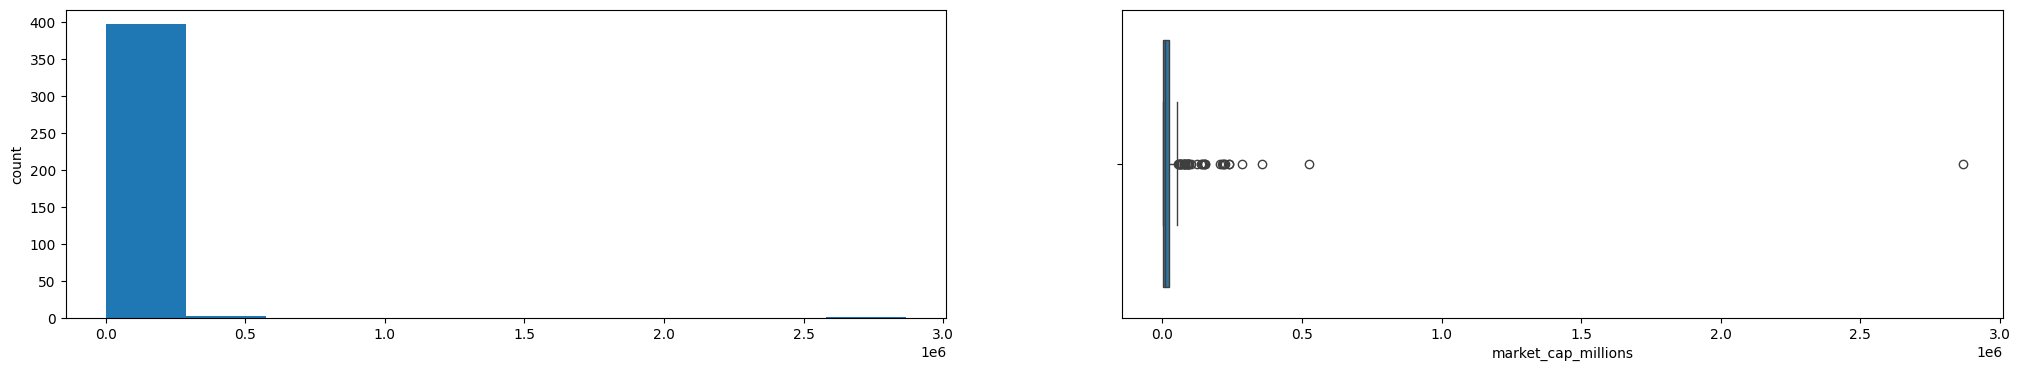

price_earnings_ratio
Skew : 4.07


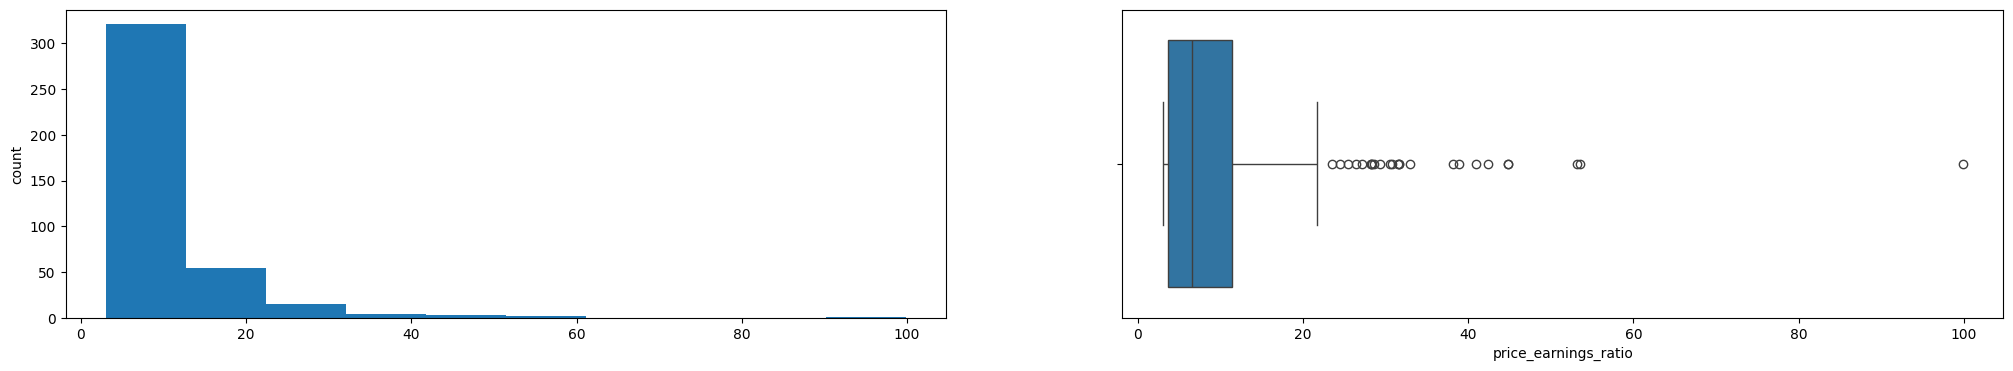

price_book_ratio
Skew : 2.17


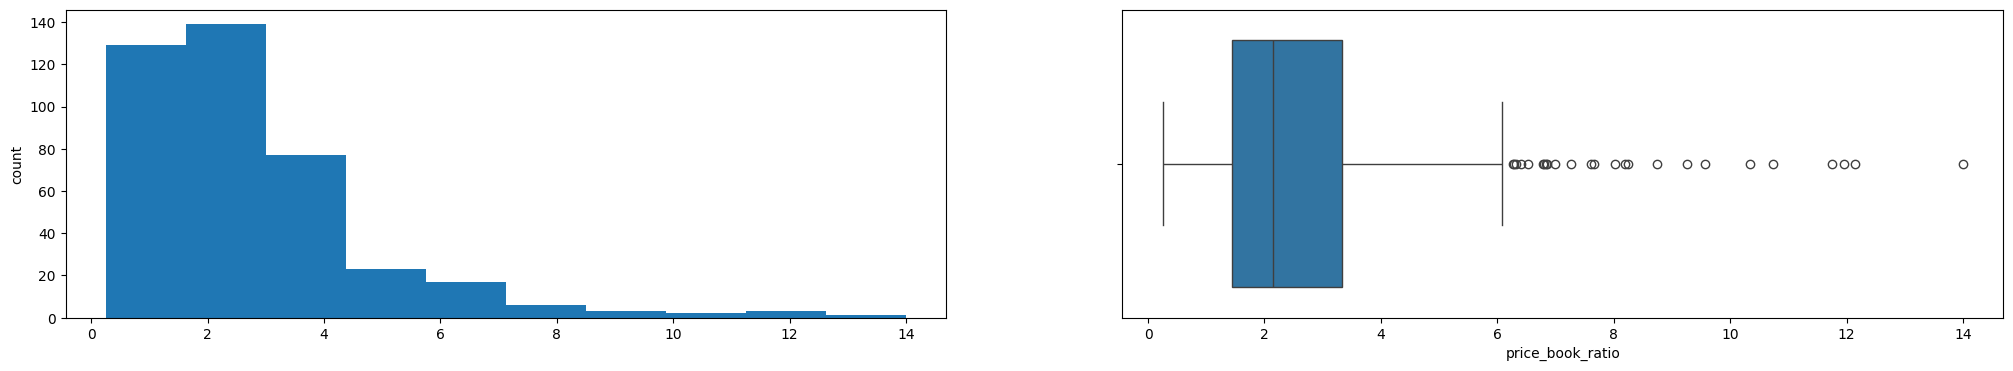

ev_ebitda_ratio
Skew : 1.66


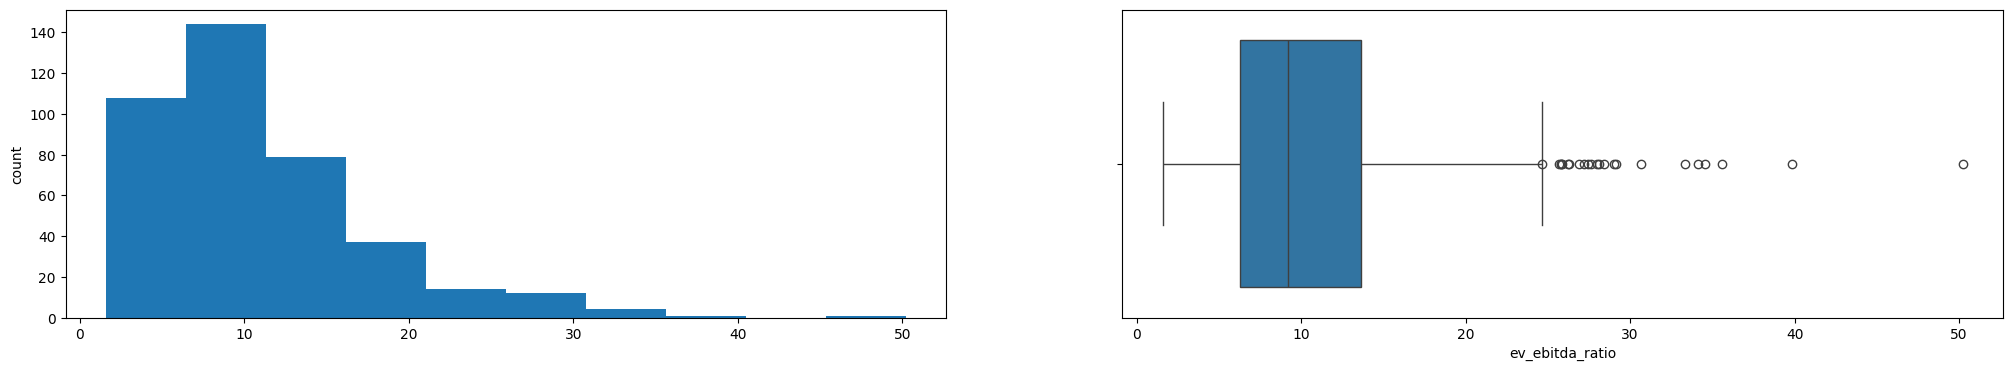

price_sales_ratio
Skew : 2.98


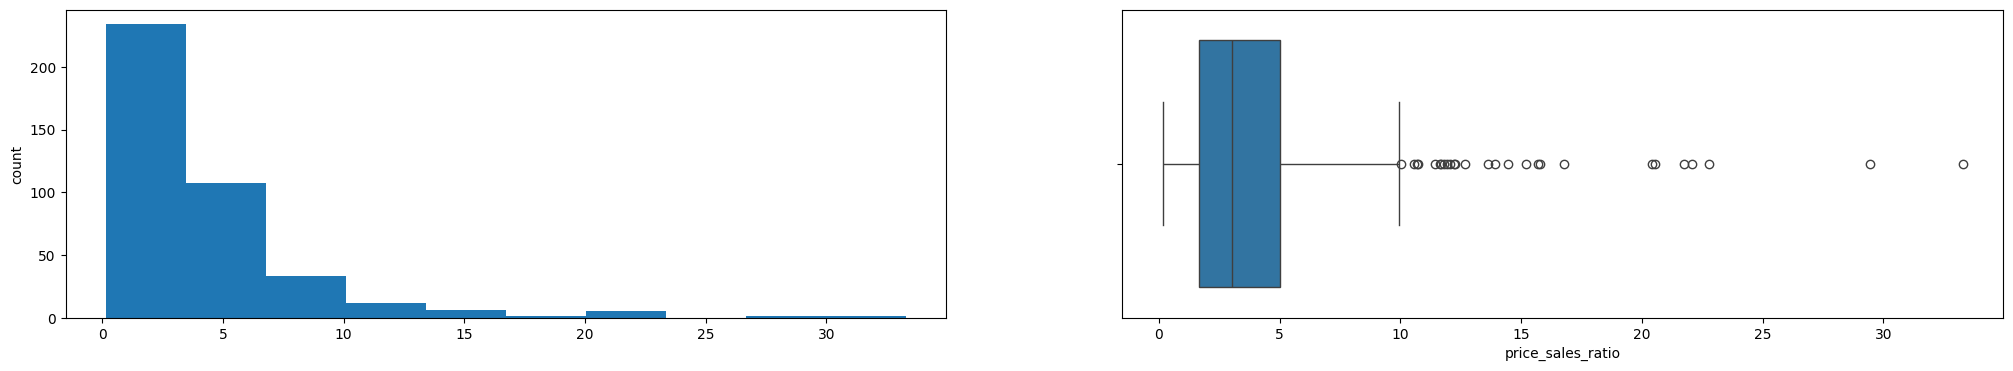

return_on_equity
Skew : -0.01


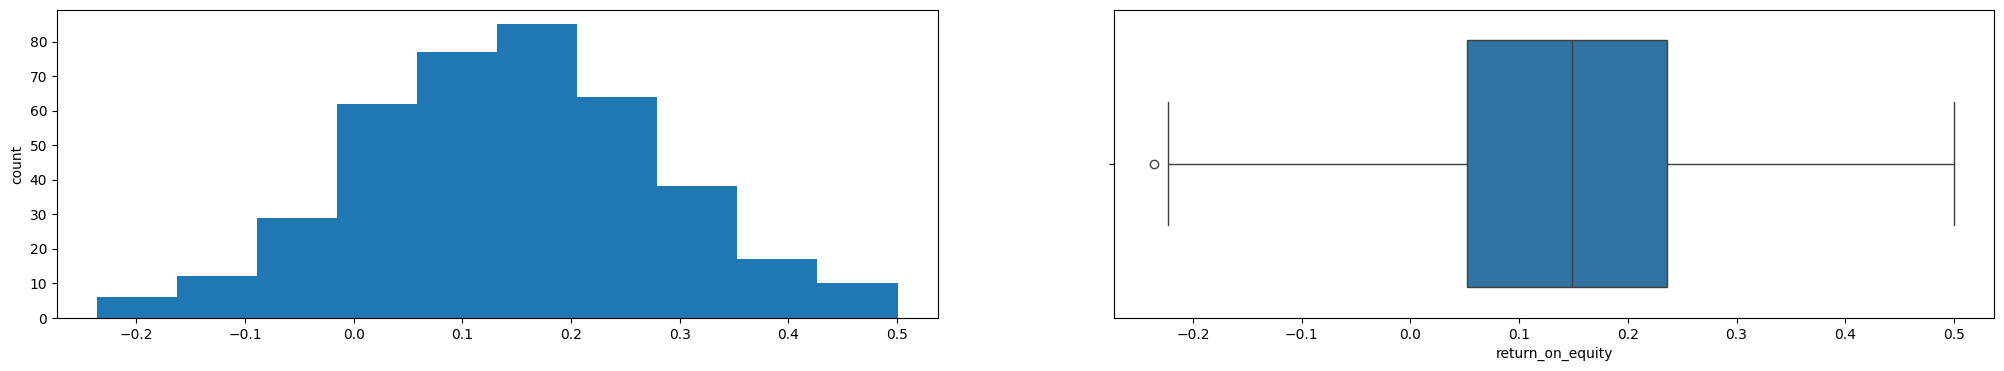

return_on_assets
Skew : 0.01


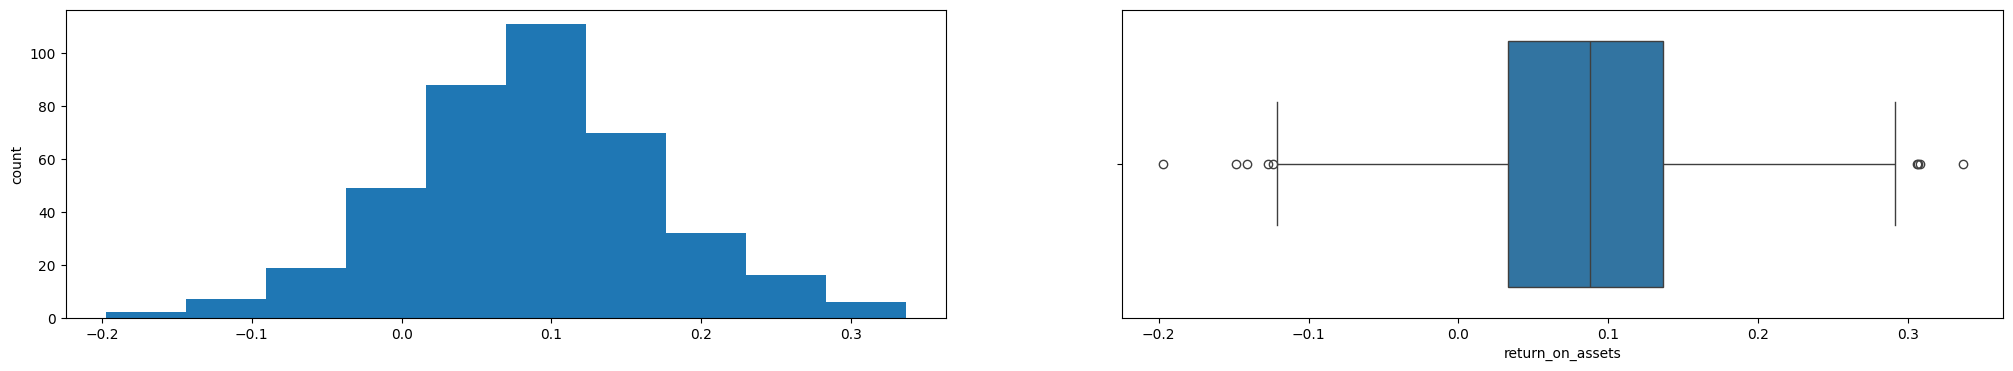

profit_margin
Skew : -0.03


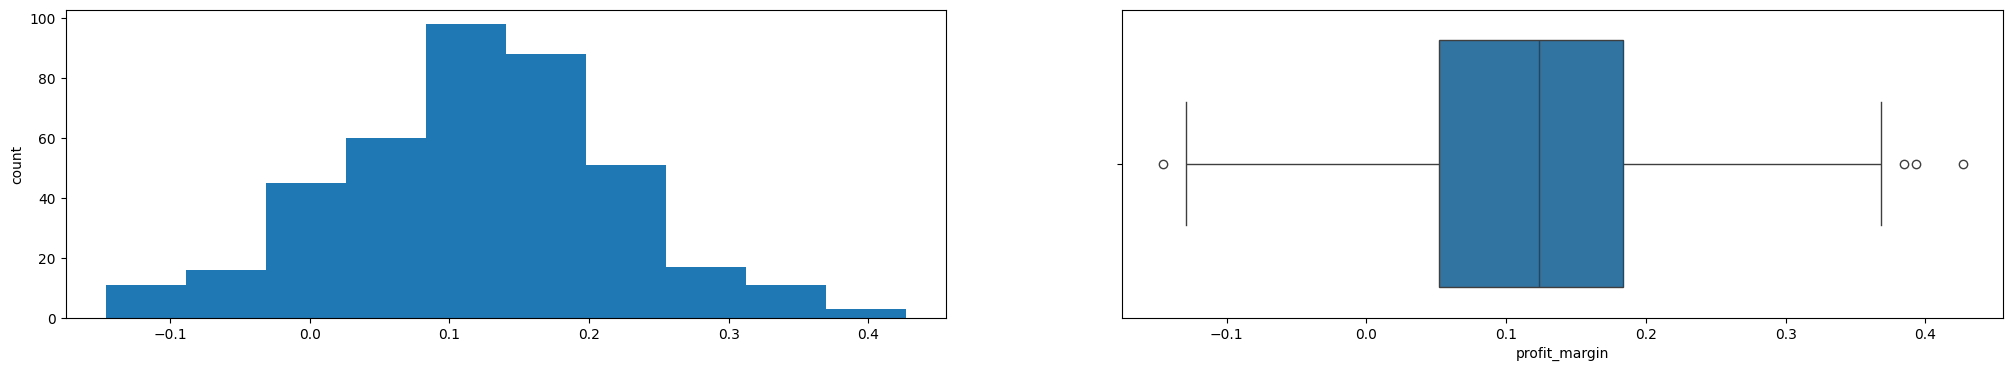

gross_margin
Skew : 0.2


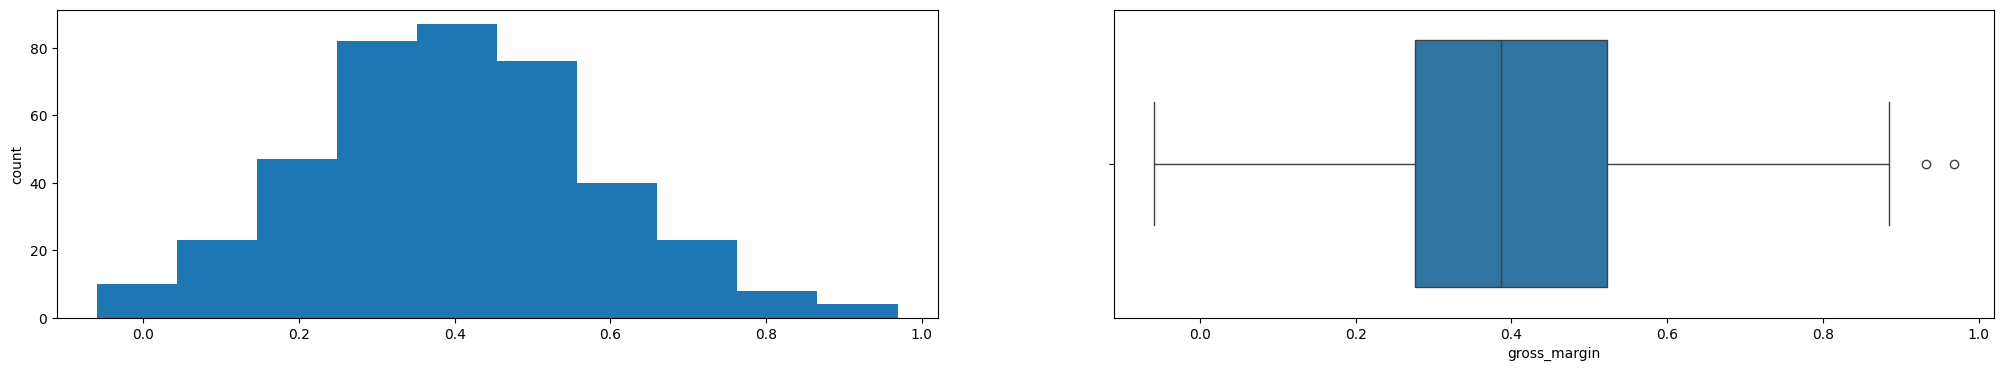

operating_margin
Skew : 0.08


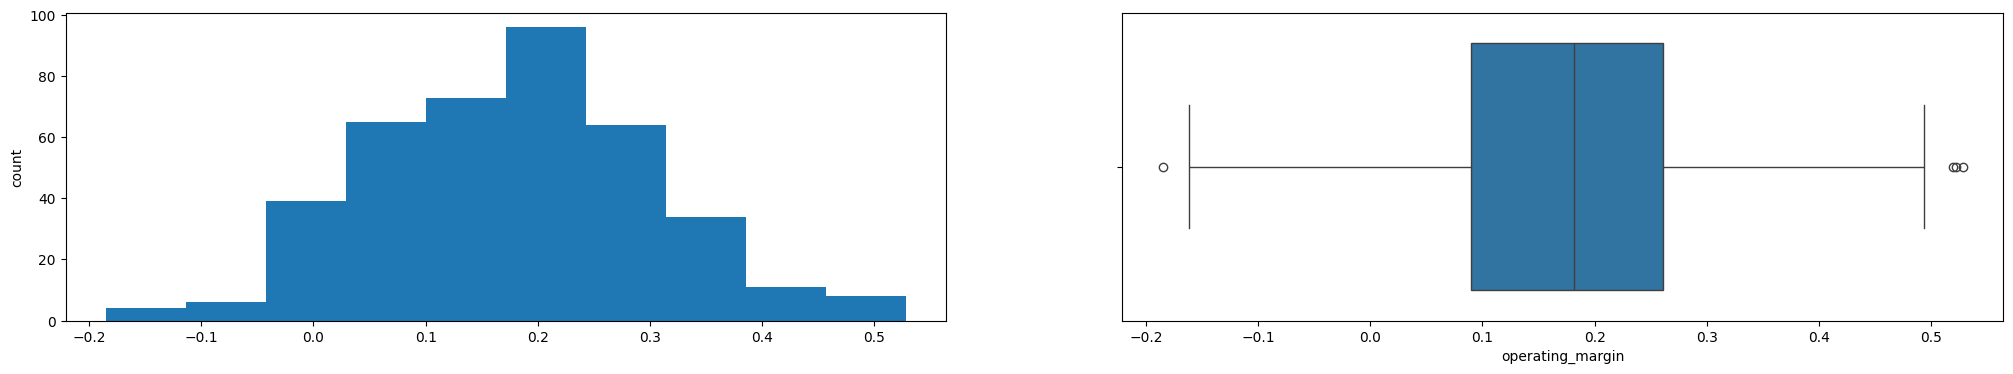

debt_to_equity
Skew : 1.74


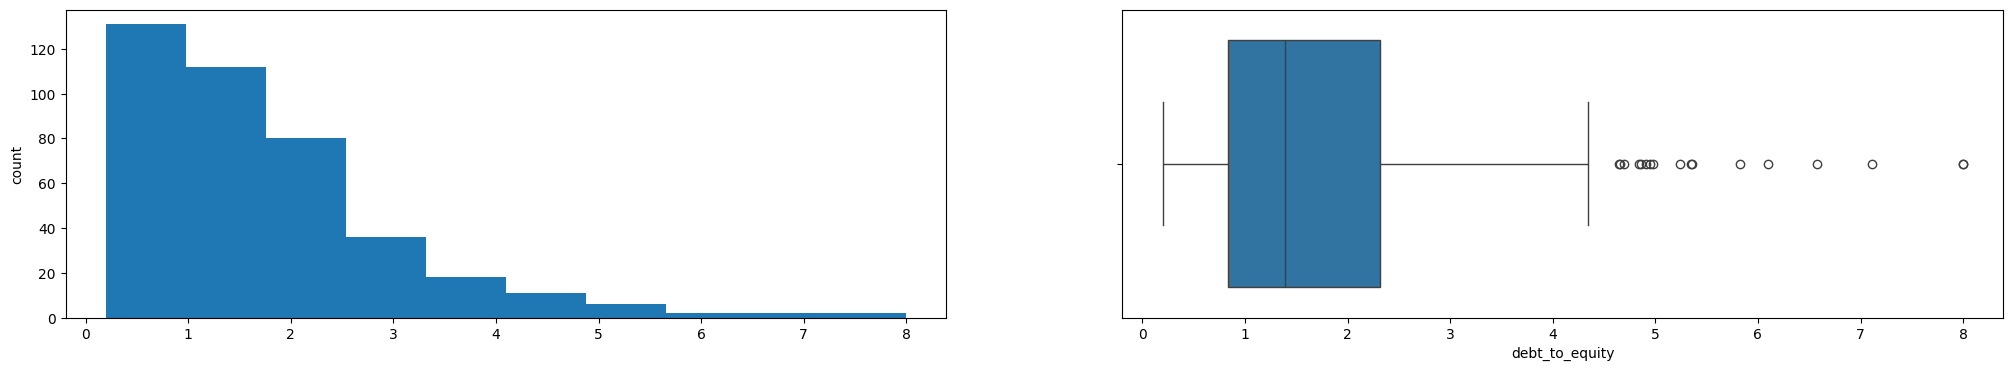

current_ratio
Skew : 0.23


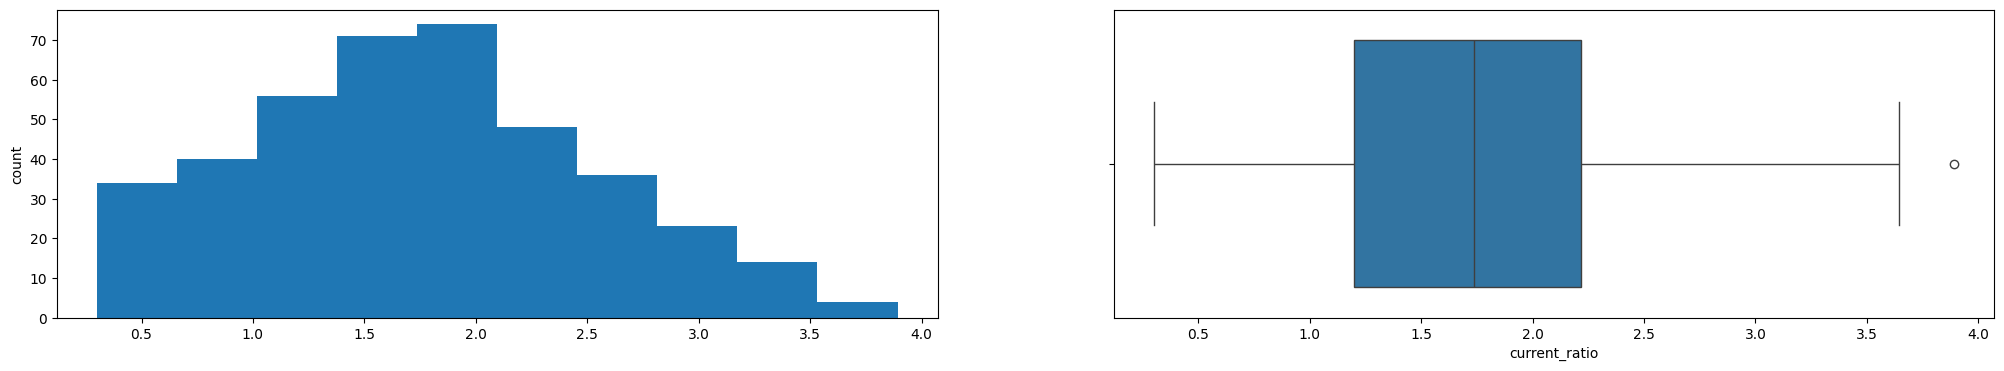

quick_ratio
Skew : 0.19


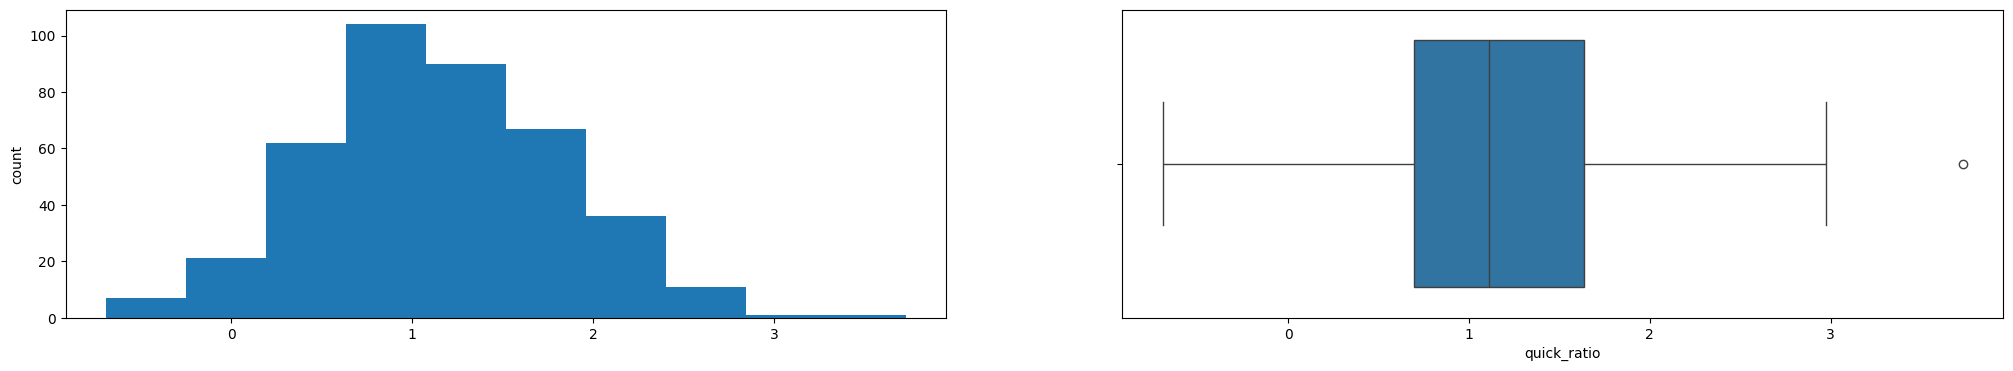

interest_coverage
Skew : 6.98


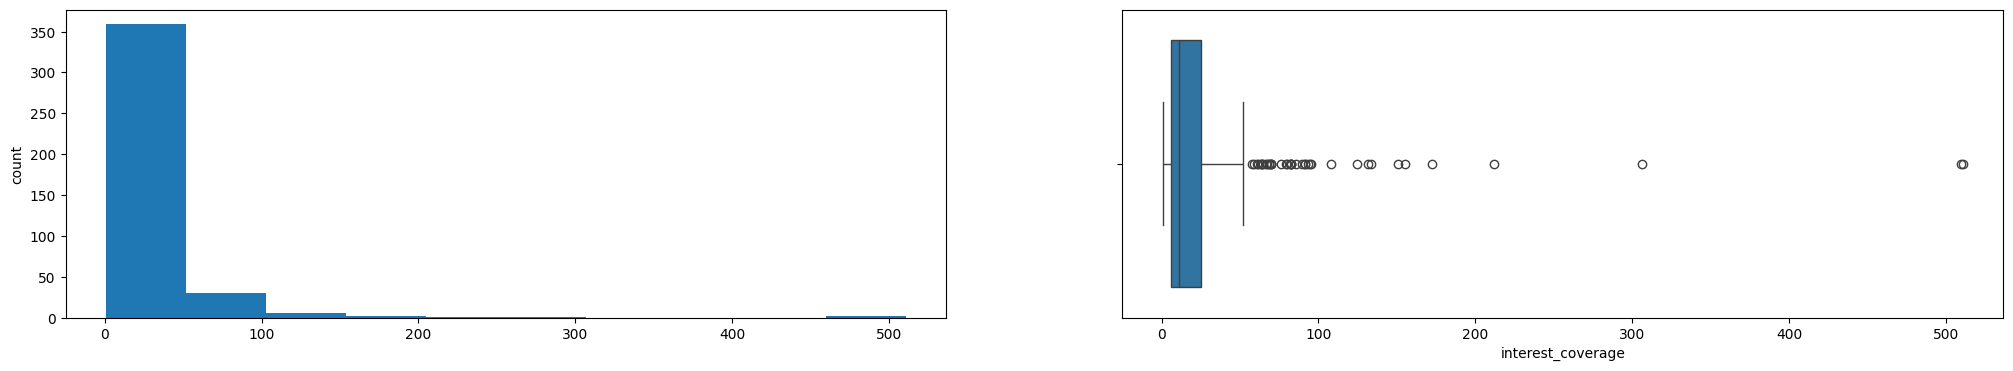

revenue_growth_1yr
Skew : -0.04


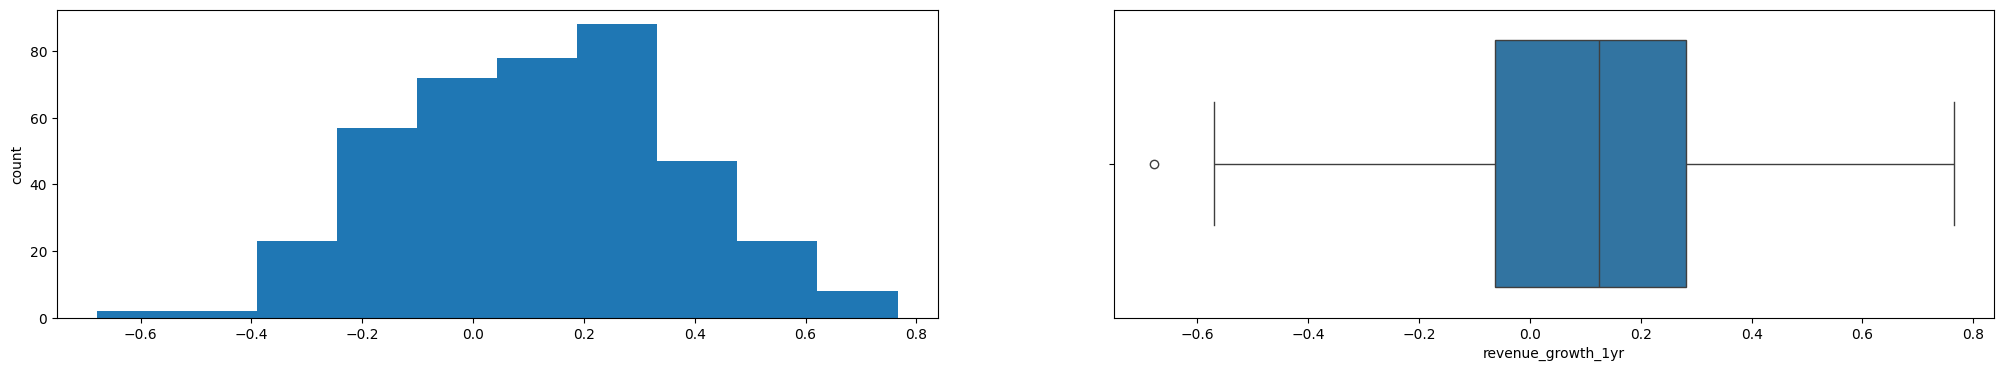

revenue_growth_3yr
Skew : -0.08


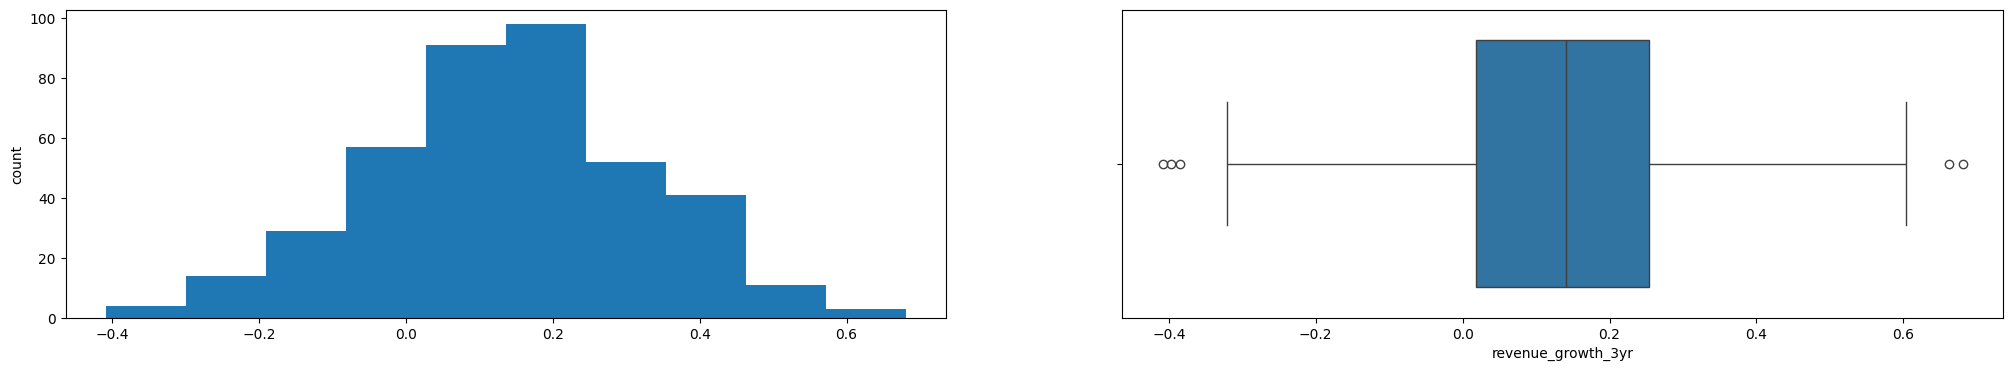

earnings_growth_1yr
Skew : -0.11


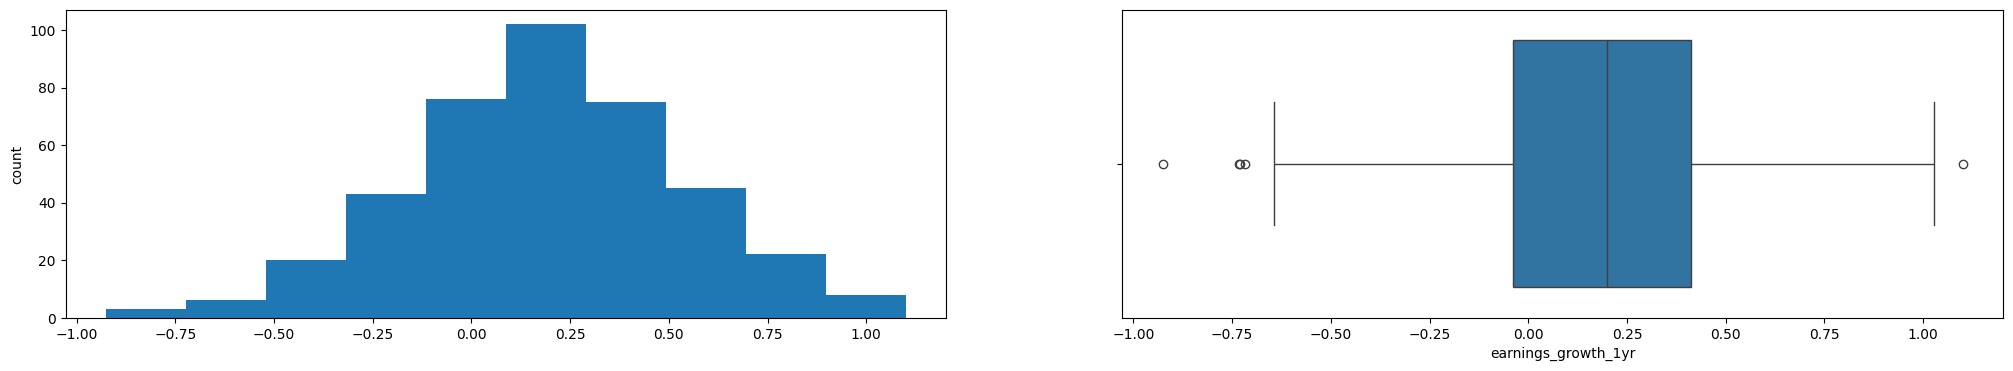

book_value_growth
Skew : -0.18


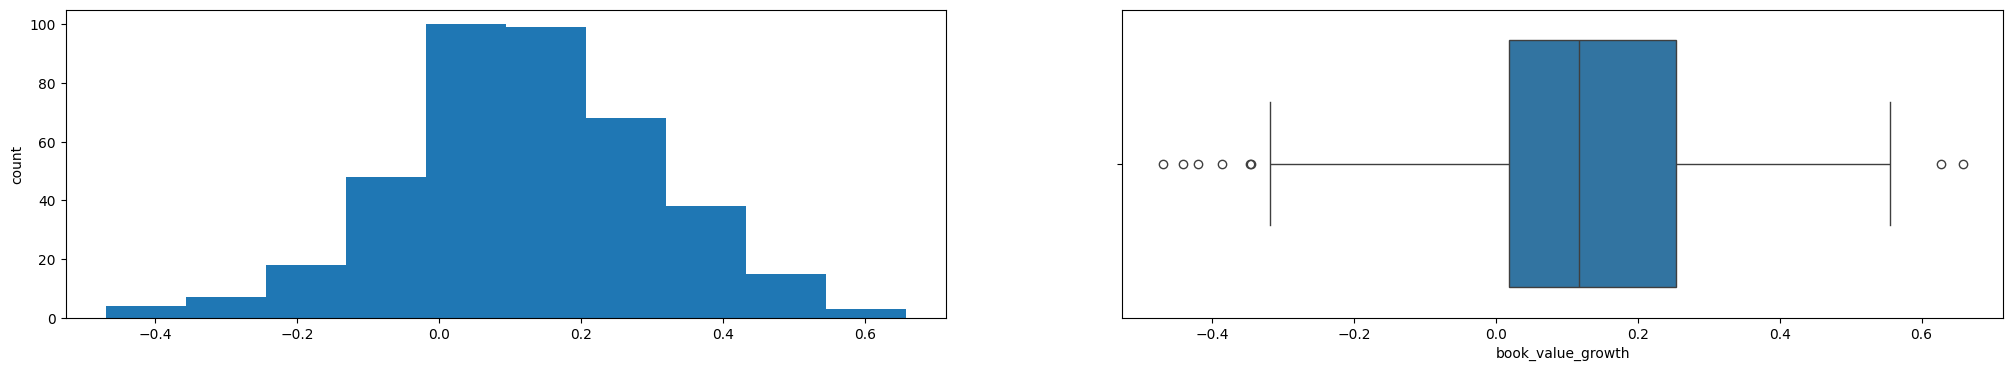

beta
Skew : -0.09


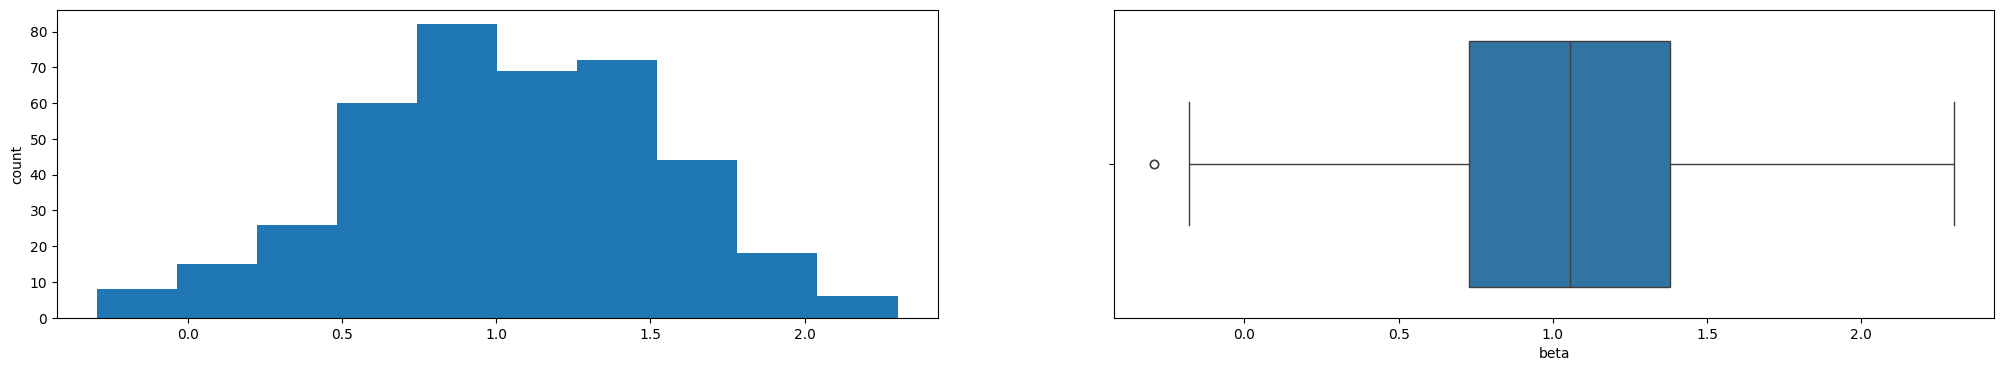

volatility_30d
Skew : 2.6


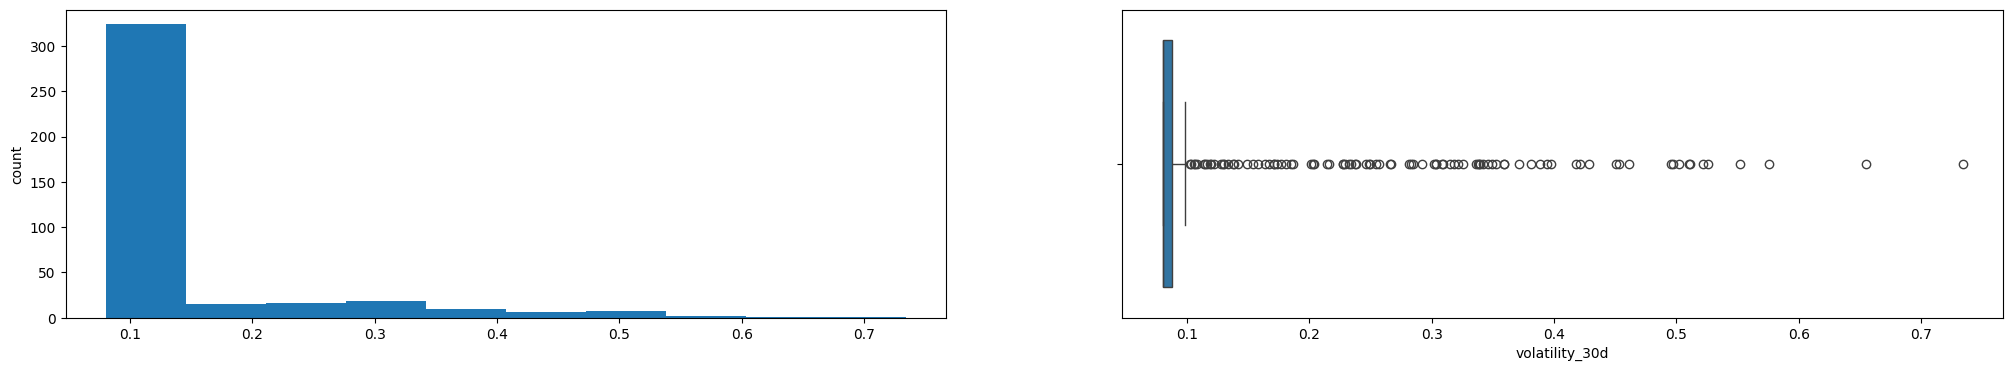

avg_volume_millions
Skew : 15.3


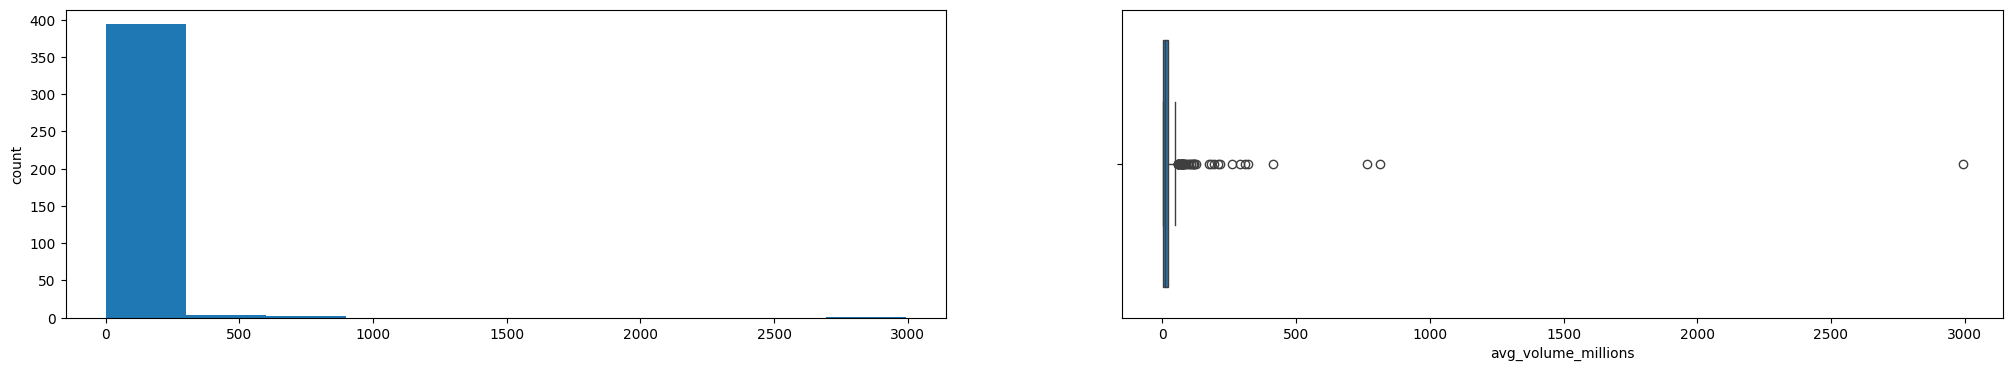

price_momentum_3m
Skew : -0.23


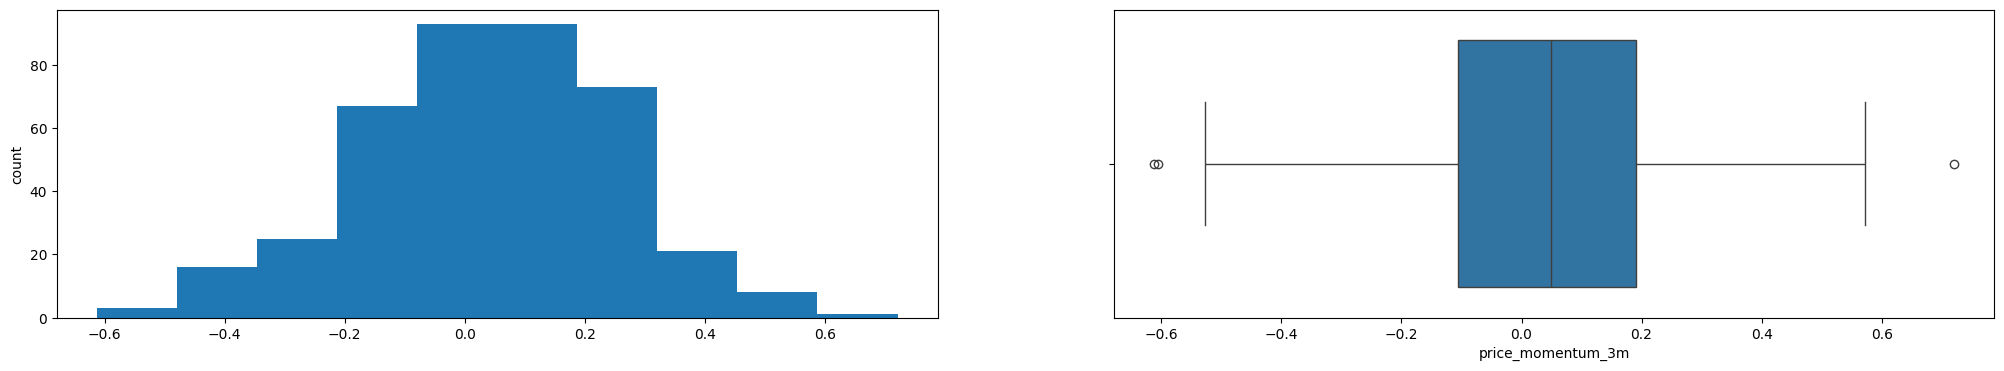

price_momentum_12m
Skew : 0.19


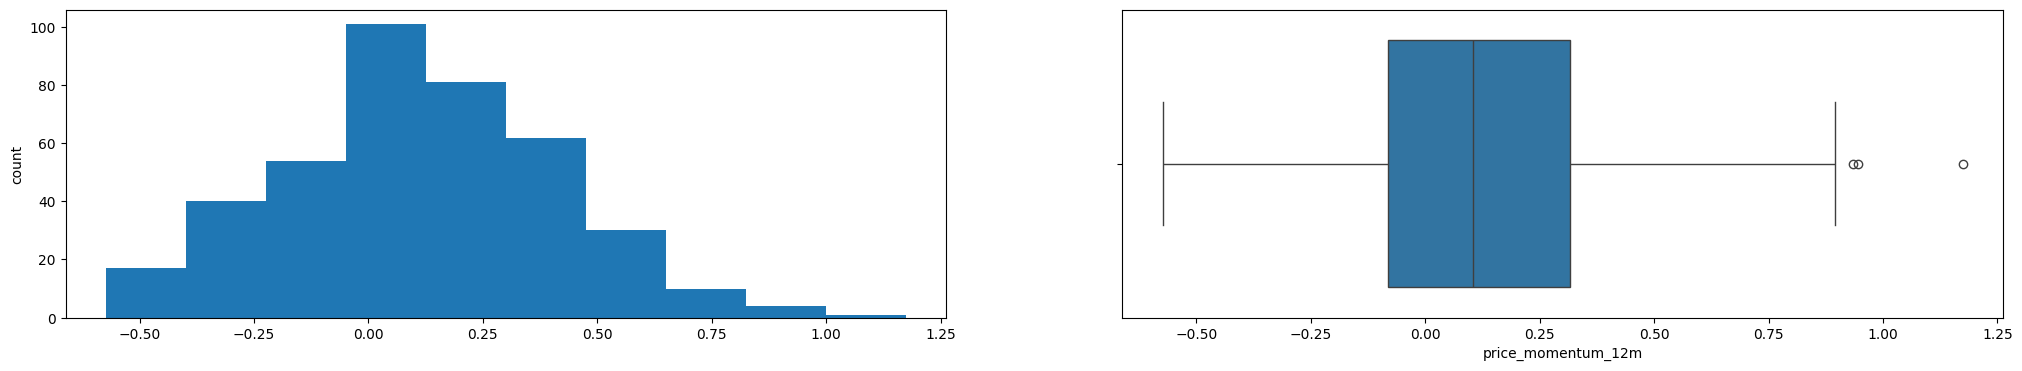

rsi_14d
Skew : -0.01


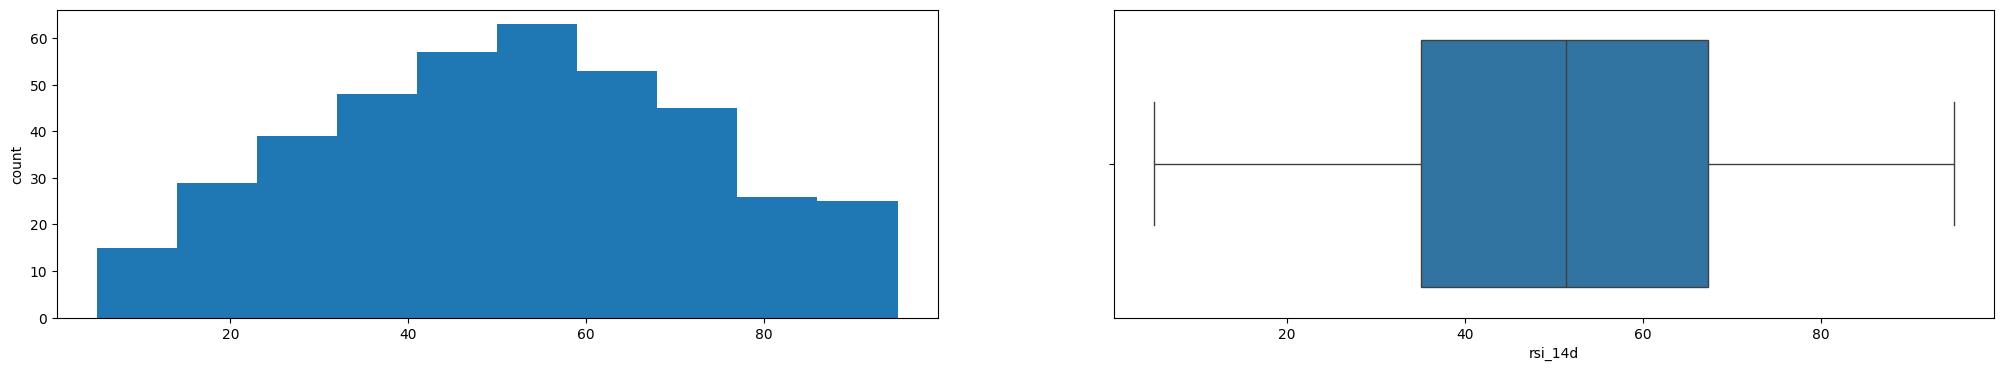

price_to_ma50
Skew : -0.06


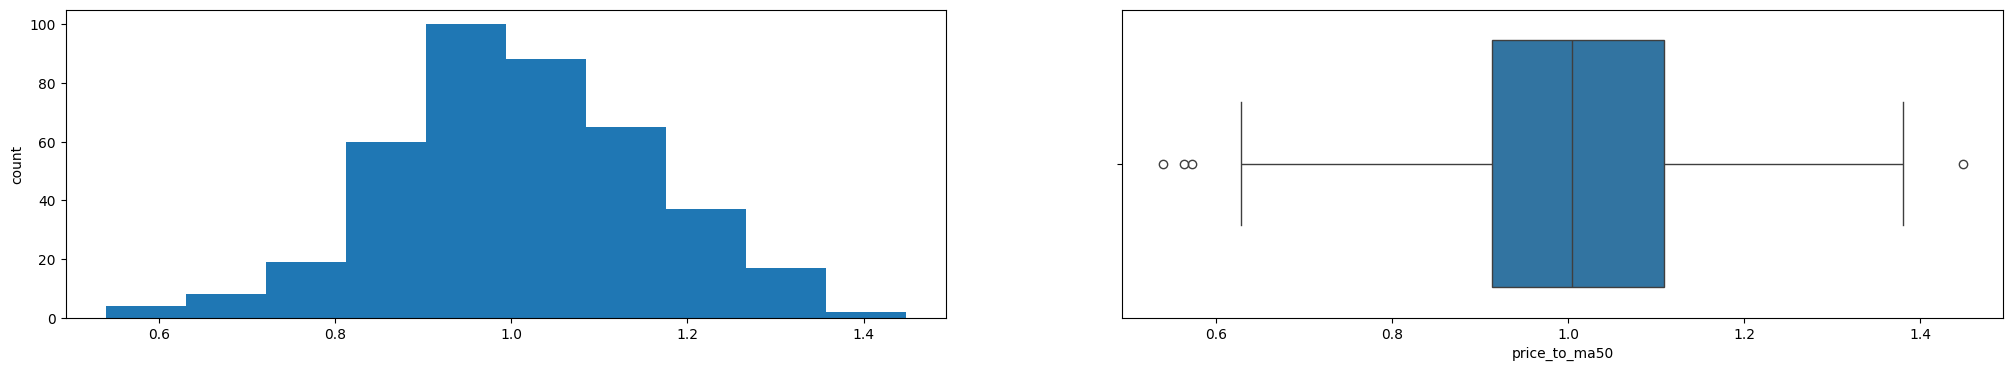

price_to_ma200
Skew : -0.18


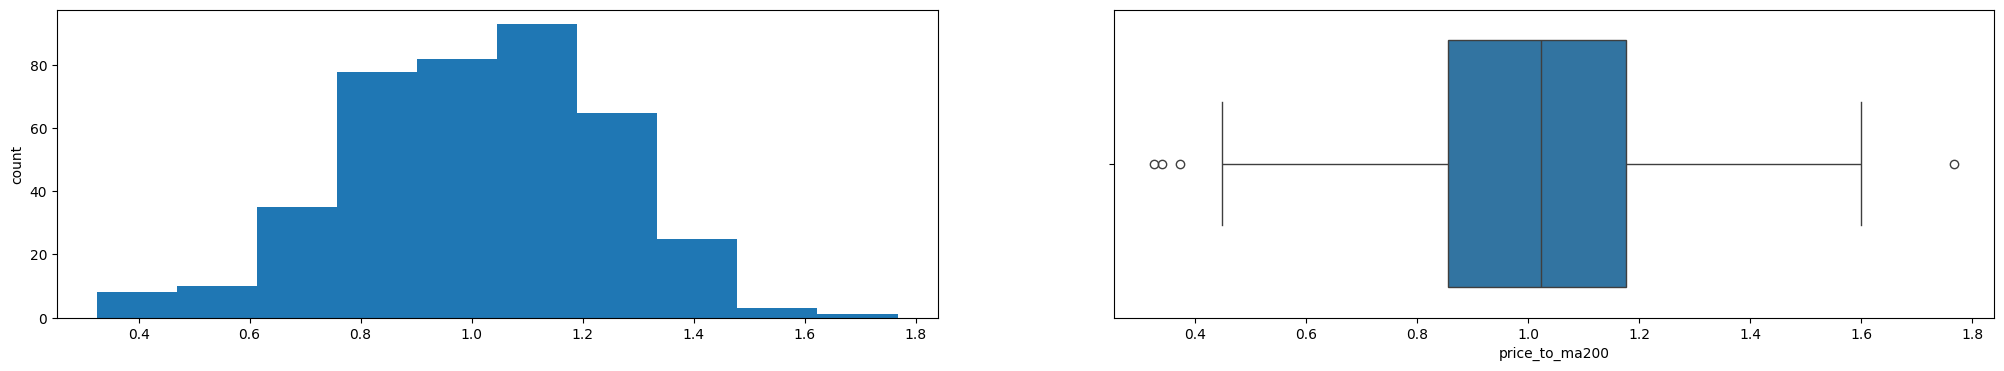

dividend_yield
Skew : 0.8


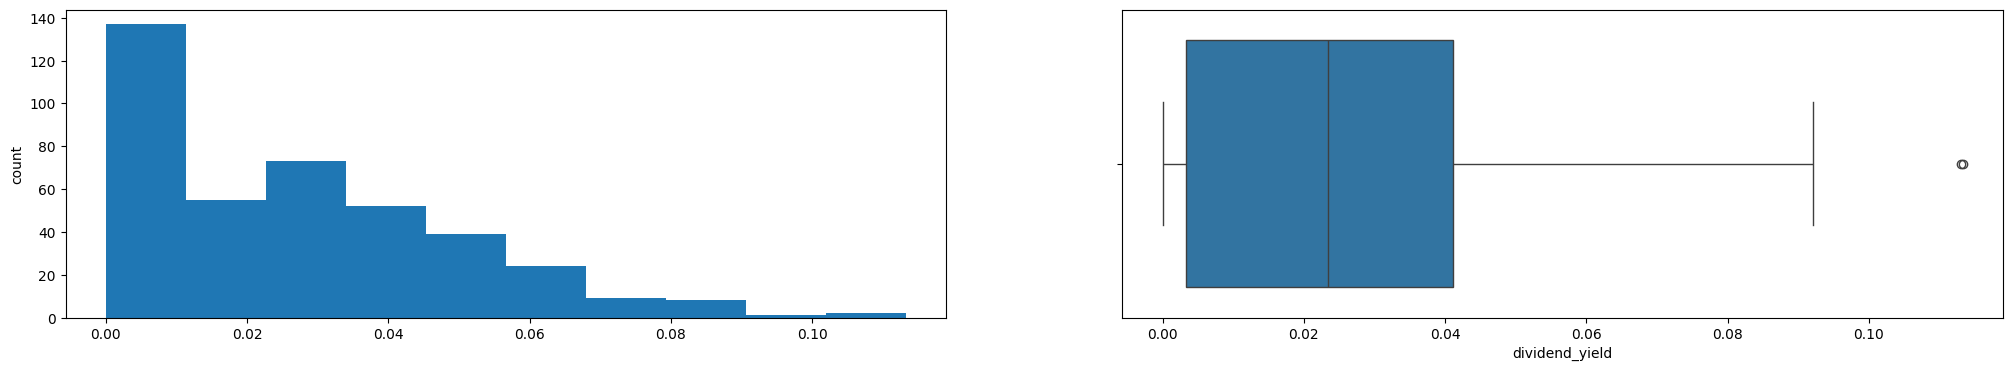

payout_ratio
Skew : 0.3


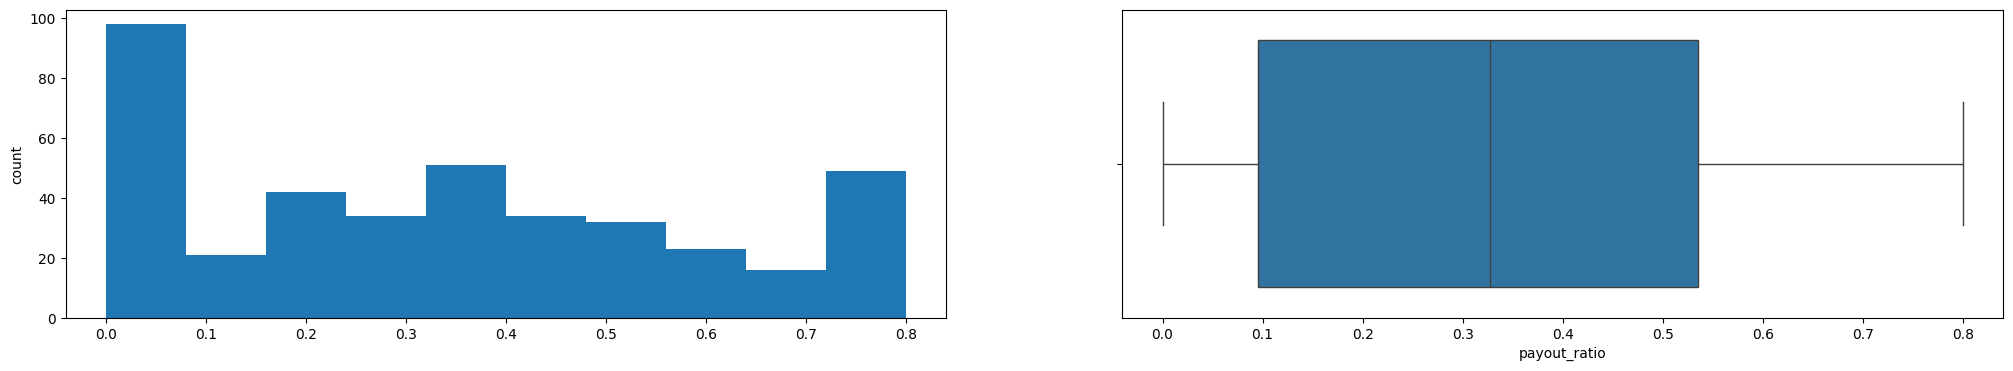

sector_encoded
Skew : 0.05


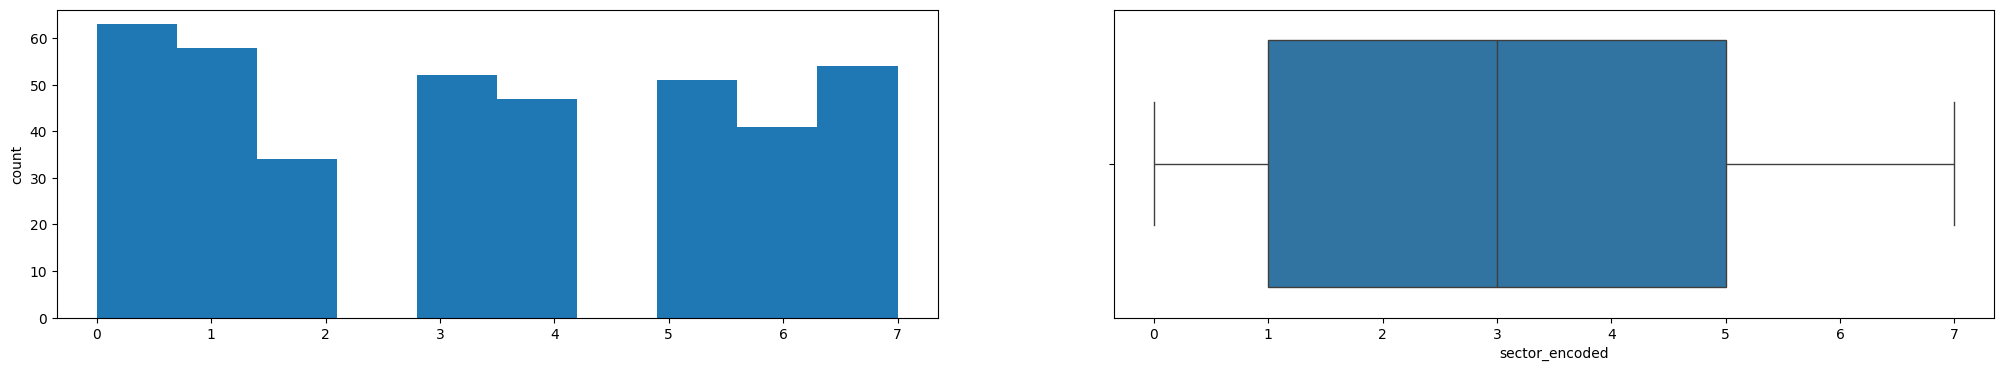

In [ ]:
# Update cont_cols to include 'sector_encoded' and use the data_financial dataframe
cont_cols = list(data_financial.columns)

for col in cont_cols:
  print(col)
  # Use data_financial for skew calculation as it contains 'sector_encoded'

  print('Skew :',round(data_financial[col].skew(),2))
  plt.figure(figsize = (25, 4))
  plt.subplot(1, 2, 1)

  data_financial[col].hist(bins = 10, grid = False)

  plt.ylabel('count')
  plt.subplot(1, 2, 2)

  sns.boxplot(x = data_financial[col])
  plt.show()

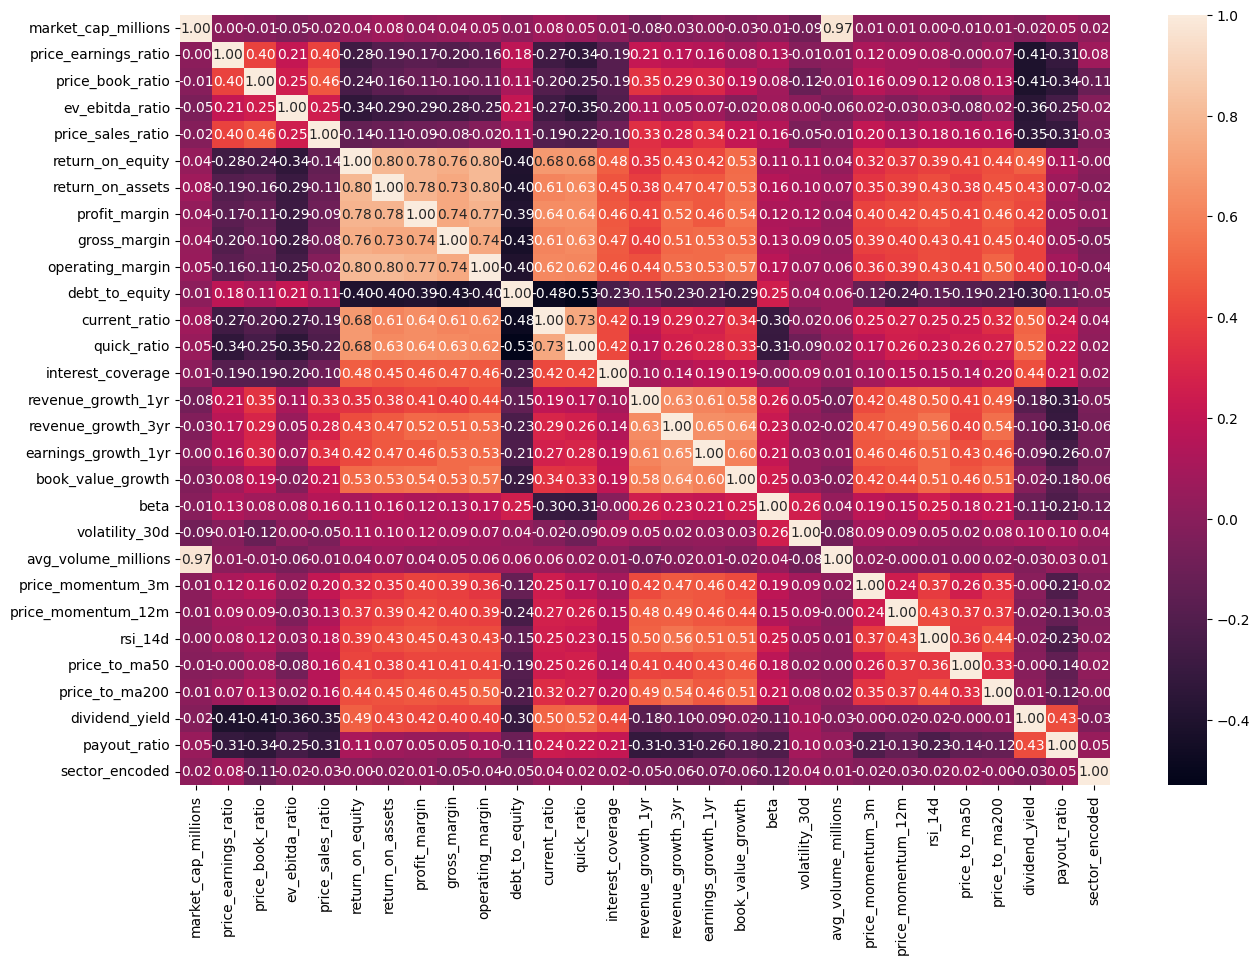

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_financial.corr(), annot=True, fmt = '0.2f')
plt.show()

In [ ]:
# Scaling the Data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_financial), columns=data_financial.columns)

In [ ]:
data_scaled.head()

,market_cap_millions,price_earnings_ratio,price_book_ratio,ev_ebitda_ratio,price_sales_ratio,return_on_equity,return_on_assets,profit_margin,gross_margin,operating_margin,...,volatility_30d,avg_volume_millions,price_momentum_3m,price_momentum_12m,rsi_14d,price_to_ma50,price_to_ma200,dividend_yield,payout_ratio,sector_encoded
0,-0.086095,0.309094,-0.722554,2.485884,0.508098,-1.108635,-0.795067,-1.501739,-1.166853,-1.742975,...,-0.441453,-0.046830,-1.007808,0.173459,-1.920120,-0.051351,-0.038156,-1.110644,-1.106631,-1.418352
1,-0.158043,-0.420202,-0.373578,-0.345480,-0.863157,0.288926,-0.790376,-0.455996,-0.064164,-1.059951,...,-0.441453,-0.179558,-1.009354,-0.678373,-0.390996,-0.035517,0.825268,0.319111,0.111983,-0.997788
2,-0.047534,0.450724,-0.125036,0.759937,-0.107223,0.180526,-0.230961,-0.237423,-0.008845,-0.812143,...,-0.441453,-0.089103,0.419151,-0.029828,0.271670,-0.555135,0.327395,-0.607265,-1.091624,-0.577224
3,0.374646,-0.225621,-0.045903,-0.929708,-0.734215,-0.036274,0.016495,0.226795,0.175566,-0.219056,...,-0.441453,0.170383,0.773299,0.933988,-0.199147,-0.060084,-0.082474,0.423655,-1.070104,-0.997788
4,-0.161721,-0.658550,-0.772064,-0.694804,-0.731551,-0.313458,-0.418606,-1.028498,-0.671973,-0.499468,...,-0.083411,-0.189730,-1.673917,-0.731983,-2.137669,0.619575,-0.376503,-0.468430,0.044927,-0.156660


### PCA

In [ ]:
# Defining the number of PC to generate
n = data_scaled.shape[1]

# Finding PC for the data
pca = PCA(n_components = n, random_state=1)

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

# The percentage of variance explained by each PC
exp_var = pca.explained_variance_ratio_

In [ ]:
print(n)

29


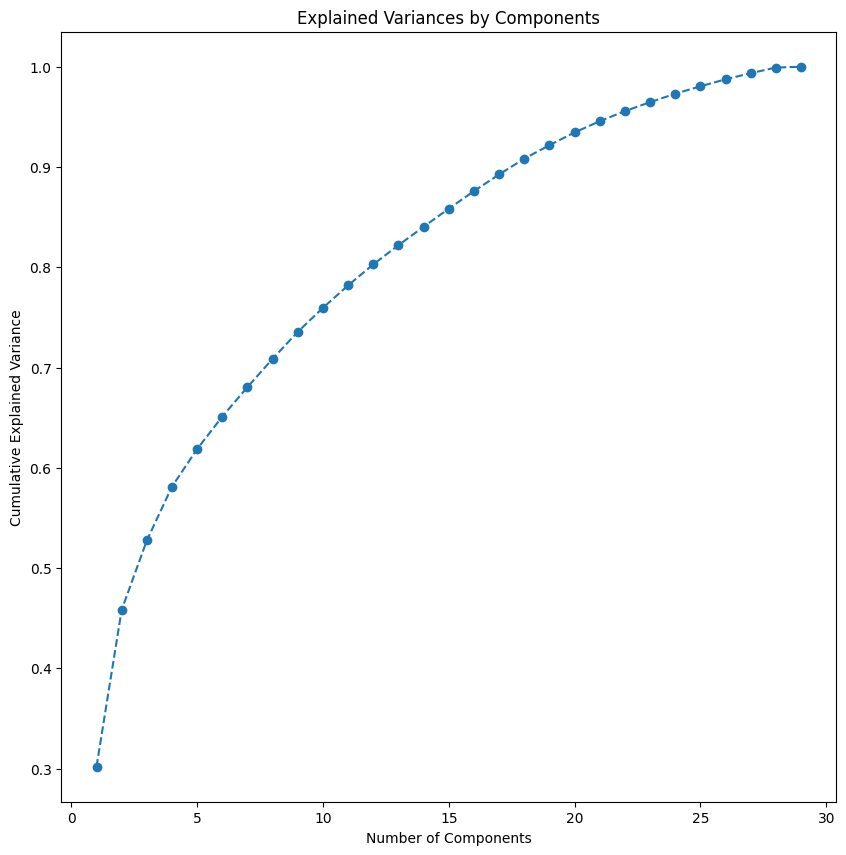

In [ ]:
# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 30), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# Finding the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var):

    sum = sum + i

    if(sum>0.70):

        print("Number of PCs that explain at least 70% variance:", ix + 1)
        break

Number of PCs that explain at least 70% variance: 8


In [ ]:
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8']

# pc_comps = ['PC1', 'PC2', 'PC3', 'PC4']

data_pca = pd.DataFrame(np.round(pca.components_[:8,:],2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
market_cap_millions,0.01,0.04,0.69,0.02,0.02,0.01,0.08,0.06
price_earnings_ratio,-0.05,-0.28,0.05,-0.08,0.24,0.29,-0.30,0.11
price_book_ratio,-0.01,-0.31,0.04,-0.22,-0.16,0.28,-0.14,0.13
ev_ebitda_ratio,-0.08,-0.22,-0.03,-0.04,0.04,0.19,0.67,-0.15
price_sales_ratio,0.01,-0.30,0.03,-0.12,0.01,0.36,-0.25,0.11
return_on_equity,0.29,0.13,-0.00,0.08,-0.01,-0.03,-0.05,-0.07
return_on_assets,0.29,0.09,0.03,0.10,-0.02,-0.01,-0.05,-0.06
profit_margin,0.29,0.07,0.00,0.06,0.02,0.02,-0.04,-0.07
gross_margin,0.29,0.06,0.01,0.04,-0.06,0.02,-0.04,-0.05
operating_margin,0.30,0.06,0.02,0.06,-0.04,0.07,-0.07,-0.04


In [ ]:
def color_high(val):

    if val < -0.25:                     # You can decide any value as per your understanding
        return 'background: pink'

    elif val > 0.25:
        return 'background: skyblue'

    elif val == 0:
        return 'background: black'

data_pca.T.style.map(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
market_cap_millions,0.010000,0.040000,0.690000,0.020000,0.020000,0.010000,0.080000,0.060000
price_earnings_ratio,-0.050000,-0.280000,0.050000,-0.080000,0.240000,0.290000,-0.300000,0.110000
price_book_ratio,-0.010000,-0.310000,0.040000,-0.220000,-0.160000,0.280000,-0.140000,0.130000
ev_ebitda_ratio,-0.080000,-0.220000,-0.030000,-0.040000,0.040000,0.190000,0.670000,-0.150000
price_sales_ratio,0.010000,-0.300000,0.030000,-0.120000,0.010000,0.360000,-0.250000,0.110000
return_on_equity,0.290000,0.130000,-0.000000,0.080000,-0.010000,-0.030000,-0.050000,-0.070000
return_on_assets,0.290000,0.090000,0.030000,0.100000,-0.020000,-0.010000,-0.050000,-0.060000
profit_margin,0.290000,0.070000,0.000000,0.060000,0.020000,0.020000,-0.040000,-0.070000
gross_margin,0.290000,0.060000,0.010000,0.040000,-0.060000,0.020000,-0.040000,-0.050000
operating_margin,0.300000,0.060000,0.020000,0.060000,-0.040000,0.070000,-0.070000,-0.040000


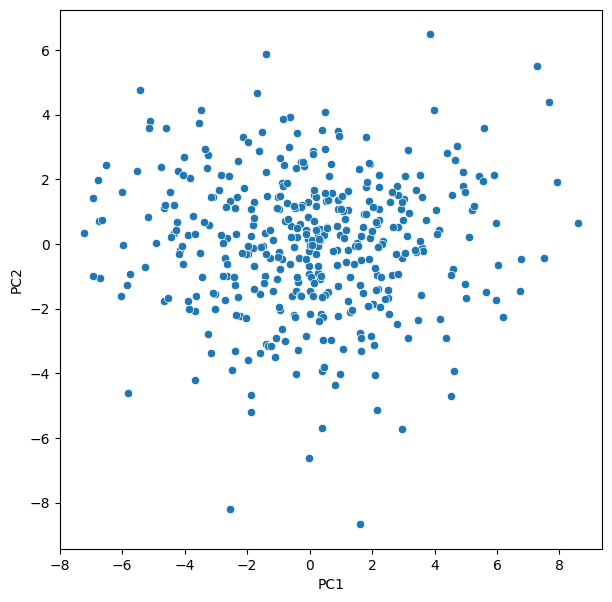

In [ ]:
plt.figure(figsize = (7,7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()